# <font color='#FFE15D'>**Week 14: SVM ⚞**</font>

## **🔸 Imports**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## **🔸 SVM (sklearn)**

In [56]:
from sklearn.svm import LinearSVC, SVC, NuSVC

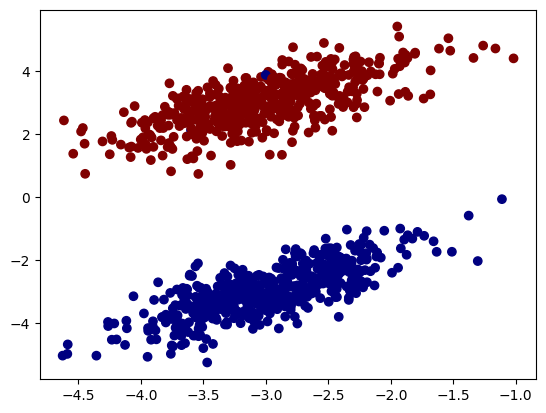

In [57]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=3., random_state=12)

# flags = np.ones((1000), dtype=np.bool_)
# flags[[154, 770]] = False
# X = X[flags, :]
# y = y[flags]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

### `LinearSVC`

In [58]:
model = LinearSVC(loss='hinge', C=1.2, max_iter=2000)
model.fit(X, y)

LinearSVC(C=1.2, loss='hinge', max_iter=2000)

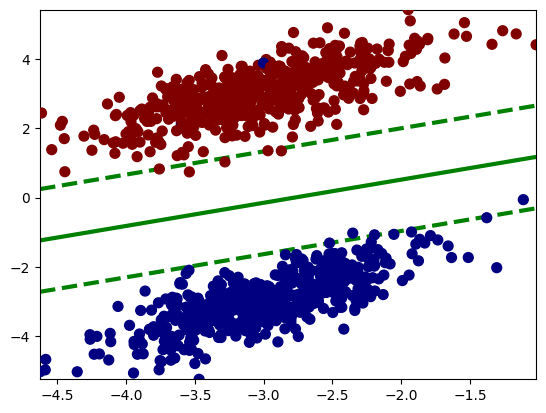

In [59]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

In [60]:
model.coef_, model.intercept_

(array([[-0.45054018,  0.67395555]]), array([-1.25191764]))

### `SVC`

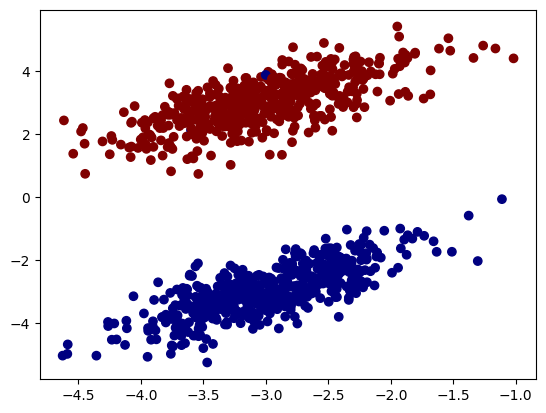

In [61]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=3., random_state=12)

# flags = np.ones((1000), dtype=np.bool_)
# flags[[154, 770]] = False
# X = X[flags, :]
# y = y[flags]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

In [62]:
# model = SVC(C=.01, kernel='linear', probability=True)
# model = SVC(C=5, kernel='linear', probability=True)
model = SVC(C=1., kernel='linear', probability=True)
model.fit(X, y)

SVC(kernel='linear', probability=True)

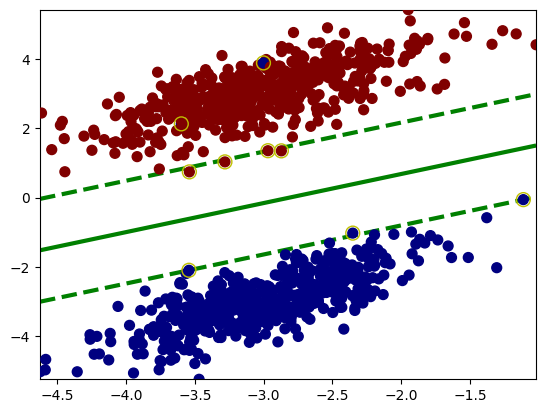

In [63]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')

In [64]:
model.coef_, model.intercept_

(array([[-0.56479367,  0.67330386]]), array([-1.58961003]))

In [65]:
model.support_, model.n_support_, model.support_vectors_

(array([154, 225, 770, 808, 902, 115, 208, 819, 930]),
 array([5, 4]),
 array([[-3.59933761,  2.13168499],
        [-3.54362177, -2.0973053 ],
        [-3.00151302,  3.89163354],
        [-1.11101484, -0.05673739],
        [-2.35190906, -1.02402418],
        [-2.96893669,  1.35660636],
        [-3.54068182,  0.74465965],
        [-3.28184747,  1.03332609],
        [-2.87147193,  1.35213726]]))

In [66]:
model.dual_coef_

array([[-1.        , -0.68790674, -1.        , -0.11781006, -1.        ,
         0.80571679,  1.        ,  1.        ,  1.        ]])

### `NuSVC`

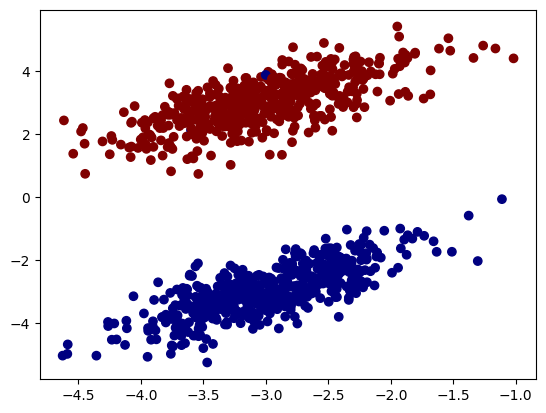

In [71]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=3., random_state=12)

# flags = np.ones((1000), dtype=np.bool_)
# flags[[154, 770]] = False
# X = X[flags, :]
# y = y[flags]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

In [ ]:
model = NuSVC(nu=0.5, kernel='linear', probability=True)
model.fit(X, y)

NuSVC(kernel='linear', probability=True)

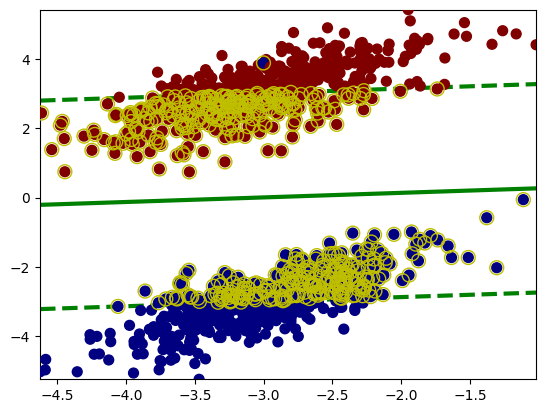

In [73]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')

In [74]:
model.predict_proba(X)

array([[0.00404063, 0.99595937],
       [0.99883114, 0.00116886],
       [0.01353273, 0.98646727],
       ...,
       [0.00443091, 0.99556909],
       [0.9966388 , 0.0033612 ],
       [0.99744723, 0.00255277]])

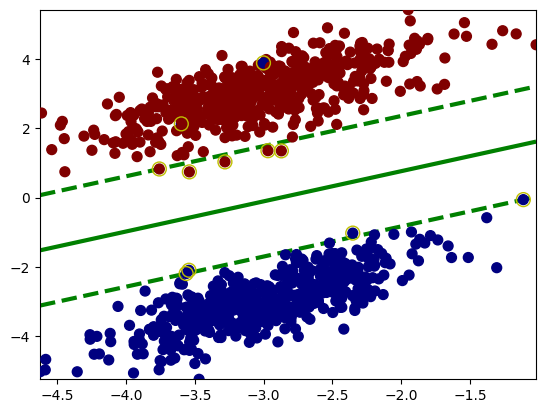

In [76]:
model = NuSVC(nu=0.01, kernel='linear', probability=True)
model.fit(X, y)

n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')

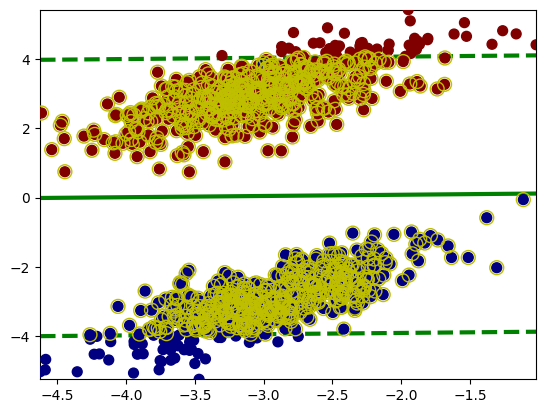

In [77]:
model = NuSVC(nu=0.9, kernel='linear', probability=True)
model.fit(X, y)

n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')

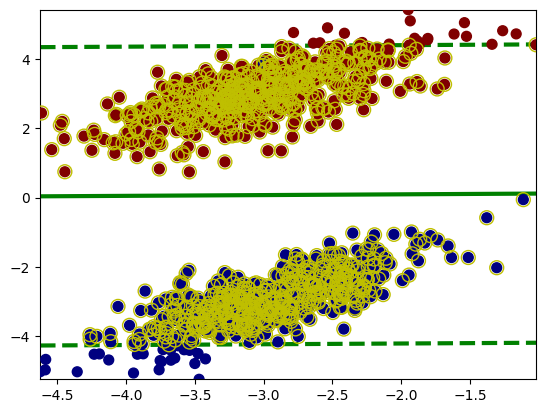

In [78]:
model = NuSVC(nu=0.95, kernel='linear', probability=True)
model.fit(X, y)

n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')